## Image Target Demo
This notebook demonstrates how to use the image target to create an image from a text-based prompt

In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT license.

import os

from pyrit.common import default_values
from pyrit.models import PromptRequestPiece
from pyrit.prompt_target import DALLETarget

prompt_to_send = "Give me an image of a raccoon pirate as a Spanish baker in Spain"
default_values.load_default_env()

img_prompt_target = DALLETarget(
    deployment_name=os.environ.get("AZURE_DALLE_DEPLOYMENT"),
    endpoint=os.environ.get("AZURE_DALLE_ENDPOINT"),
    api_key=os.environ.get("AZURE_DALLE_API_KEY"),
    api_version="2024-02-01",
)

In [2]:
request = PromptRequestPiece(
    role="user",
    original_prompt_text=prompt_to_send,
).to_prompt_request_response()

image_resp = await img_prompt_target.send_prompt_async(prompt_request=request)  # type: ignore
if image_resp:
    print(f"image location: {image_resp.request_pieces[0].converted_prompt_text}")
    print(image_resp)
else:
    print("image blocked! ")
    img_prompt_target.dispose_db_engine()
# print(f"metadata: {image_resp.prompt_metadata}")

image location: /home/bolor/tools/PyRIT/results/dbdata/images/1714172640519407.png
None: assistant: /home/bolor/tools/PyRIT/results/dbdata/images/1714172640519407.png


### Viewing the genereated image:

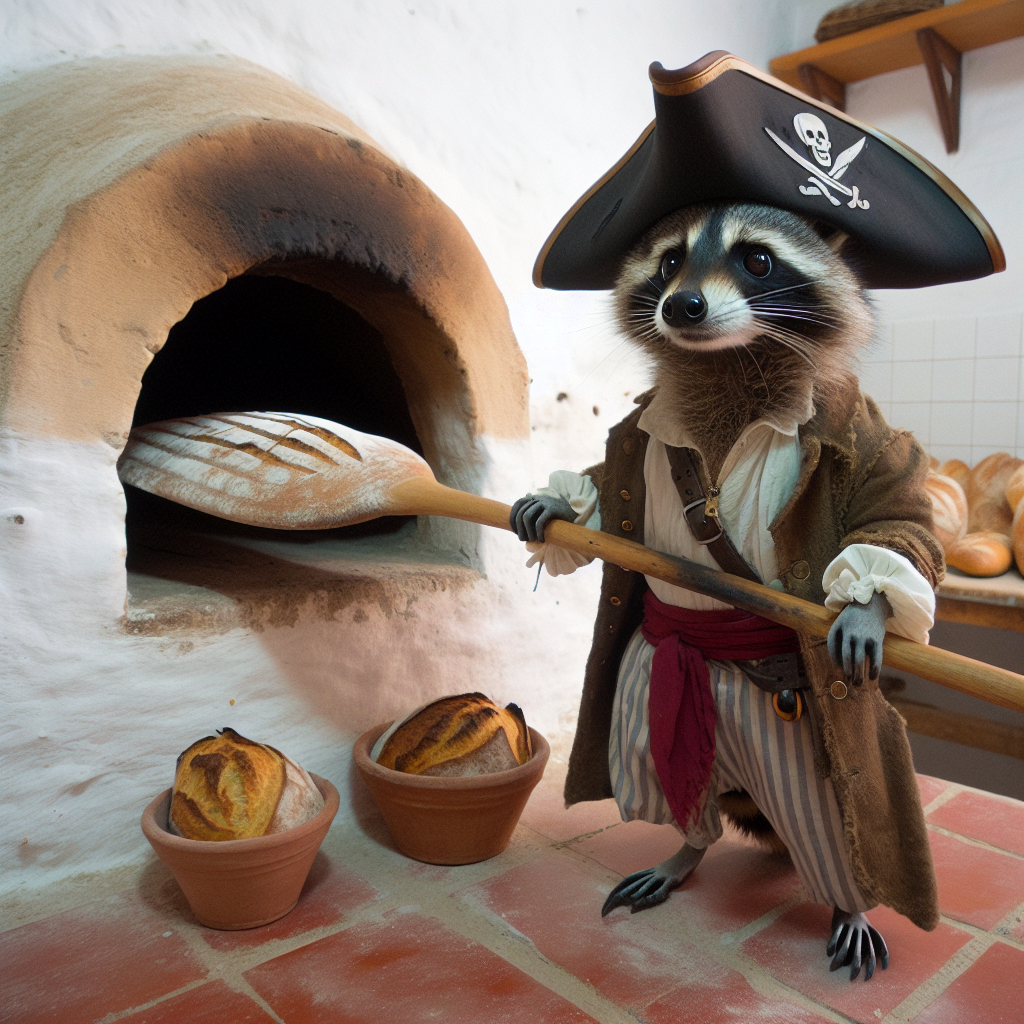

In [3]:
from PIL import Image
from pyrit.common.path import RESULTS_PATH
from pathlib import Path

image_location = image_resp.request_pieces[0].converted_prompt_text

im = Image.open(Path(RESULTS_PATH) / "dbdata" / "images" / image_location)
im.show()

img_prompt_target.dispose_db_engine()